<a href="https://colab.research.google.com/github/IsabelJnz/NLP-Sentiment-Analysis/blob/main/ChatGPT_NLP_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 97.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

# mount the 'My Drive' folder
drive.mount('/content/drive', force_remount=True)

In [ ]:
# imports
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import numpy as np
import nltk 

In [ ]:
with open('/content/drive/MyDrive/NLP/cleaned_tweets.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)
    data = [row for row in reader]

df = pd.DataFrame(data, columns=header)

In [ ]:
df.head()

,clean_text,clean_hashtags
0,chatgpt realli chang shake inform communic sec...,chatgpt
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi
3,chat golgappa papri tikki indian twist thing c...,chatgpt
4,ai expert made comment bc ckin idea talk fact ...,fact


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82999 entries, 0 to 82998
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_text      82999 non-null  object
 1   clean_hashtags  82999 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [ ]:
print(f" DF SHAPE: {df.shape}")

 DF SHAPE: (82999, 2)


In [ ]:
df.isnull().sum()

clean_text        0
clean_hashtags    0
dtype: int64

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['subjectivity'] = df['clean_text'].apply(getSubjectivity)
df['polarity'] = df['clean_text'].apply(getPolarity)

In [ ]:
df.head()

,clean_text,clean_hashtags,subjectivity,polarity
0,chatgpt realli chang shake inform communic sec...,chatgpt,0.0,0.00
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,0.6,-0.05
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,0.0,0.00
3,chat golgappa papri tikki indian twist thing c...,chatgpt,0.0,0.00
4,ai expert made comment bc ckin idea talk fact ...,fact,0.0,0.00


In [ ]:
# visualize polarity and subjectivity over time


In [ ]:
# datetime is needed

## Using nltk.sentiment.vader for Sentiment Analysis

In [36]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = sia.polarity_scores(sent)
    if scores['compound'] > 0.05:
      return 1
    elif scores['compound'] < -0.05:
      return -1
    else:
      return 0

In [41]:
df["sentiment_vader"] = df["clean_text"].apply(lambda x: vader_sentiment_result(x))

In [42]:
df.head(5)

,clean_text,clean_hashtags,subjectivity,polarity,sentiment_vader
0,chatgpt realli chang shake inform communic sec...,chatgpt,0.0,0.00,-1
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,0.6,-0.05,0
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,0.0,0.00,0
3,chat golgappa papri tikki indian twist thing c...,chatgpt,0.0,0.00,0
4,ai expert made comment bc ckin idea talk fact ...,fact,0.0,0.00,0


In [43]:
# do mapping for vader -> pos, neg, neu
label_map = {1: 'positive', 0: 'neutral', -1: 'negative'}
df['sentiment_vader'] = df['sentiment_vader'].map(label_map)

In [44]:
df.head(5)

,clean_text,clean_hashtags,subjectivity,polarity,sentiment_vader
0,chatgpt realli chang shake inform communic sec...,chatgpt,0.0,0.00,negative
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,0.6,-0.05,neutral
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,0.0,0.00,neutral
3,chat golgappa papri tikki indian twist thing c...,chatgpt,0.0,0.00,neutral
4,ai expert made comment bc ckin idea talk fact ...,fact,0.0,0.00,neutral


In [45]:
counts = df['sentiment_vader'].value_counts()
print(counts)

neutral     36316
positive    34934
negative    11749
Name: sentiment_vader, dtype: int64


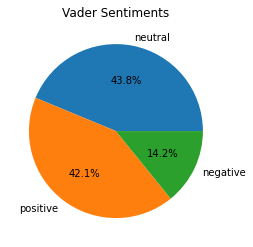

In [46]:
counts.plot(kind='pie', autopct='%1.1f%%', labels=counts.index)
plt.title('Vader Sentiments')
plt.ylabel("");

=> 

## Using Bert-base-multilingual-uncased-sentiment for Sentiment Analysis

In [47]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

This model is intended for direct use as a sentiment analysis model for product reviews in any of the six languages above, or for further finetuning on related sentiment analysis tasks.

In [48]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [49]:
def sentiment_score(tweet):
    tokens = tokenizer.encode(tweet, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [50]:
sentiment_score(df['clean_text'].iloc[1])

1

In [ ]:
df['sentiment'] = df['clean_text'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
df

,clean_text,clean_hashtags,subjectivity,polarity,sentiment
0,chatgpt realli chang shake inform communic sec...,chatgpt,0.000000,0.000000,1
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,0.600000,-0.050000,1
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,0.000000,0.000000,5
3,chat golgappa papri tikki indian twist thing c...,chatgpt,0.000000,0.000000,1
4,ai expert made comment bc ckin idea talk fact ...,fact,0.000000,0.000000,1
5,chatgpt mean busi tcoiqyuhuovhi via itpro,chatgpt,0.687500,-0.312500,3
6,usadoprobado chatgpt use chatgpt,chatgpt,0.000000,0.000000,1
7,key phrase respons chatgpt repres opportun par...,chatgpt,1.000000,0.000000,1
8,chatgpt openai playground chatbot format right...,chatgpt playground,0.545238,-0.004762,1
9,whale alert ticker usdt transact type transfer...,whale usdt coinbas unknown,0.600000,-0.100000,1


## Using Bert Uncase Sentiment

In [ ]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer

model = BertForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
def tokenize_text(text):
    return tokenizer.encode_plus(
        text,                      # the text to be tokenized
        add_special_tokens=True,   # add [CLS] and [SEP] tokens
        max_length=512,           # truncate or pad to a fixed length of 512 tokens
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'       # return PyTorch tensors
    )

# Tokenize the dataframe
df['tokenized'] = df['clean_text'].apply(lambda x: tokenize_text(x))

In [ ]:
import torch
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

def predict_sentiment(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)# .to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=1)
    _, prediction = torch.max(probs, dim=1)
    return prediction.item()

# Generate sentiment predictions for the dataframe
df['sentiment'] = df['clean_text'].apply(lambda x: predict_sentiment(model, tokenizer, x))

=> 

In [ ]:
# try sentiment analysis with kmeans etc

In [ ]:
# performing sentiment analysis on emojis?